## Rain prediction in Australia

#### Import required libraries

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report

<br>
<br>
<br>
<br>
<br>

#### Read dataset

In [189]:
dataframe= pd.read_csv(r"C:\Users\Lucio\Documents\Github\Next-day-rain-prediction\1- Data\1- Raw\weatherAUS.csv")
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [113]:
dataframe.shape

(145460, 23)

In [114]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [115]:
dataframe.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### Optimize numerical columns

In [163]:
def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    """
    This functions optimizes all of the FLOAT type 
    columns.
    """
    
    cols_float = df.select_dtypes(include=["float64"]).columns.tolist()
    df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float')
    
    return df

In [164]:
dataframe = optimize_floats(dataframe)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float32
 3   MaxTemp        144199 non-null  float32
 4   Rainfall       142199 non-null  float32
 5   Evaporation    82670 non-null   float32
 6   Sunshine       75625 non-null   float32
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float32
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float32
 12  WindSpeed3pm   142398 non-null  float32
 13  Humidity9am    142806 non-null  float32
 14  Humidity3pm    140953 non-null  float32
 15  Pressure9am    130395 non-null  float32
 16  Pressure3pm    130432 non-null  float32
 17  Cloud9am       89572 non-null

In [165]:
#Remove "Date" column from the dataset. It has no impact on the target variable
dataframe.drop("Date", axis=1, inplace=True)

<br>
<br>
<br>
<br>
<br>

#### Handle No/Yes values in target column

In [168]:
def yes_no_encoder(variable):
    """
    This function takes a Yes/No variable as an input
    and returns a codified version of it
    """
    if variable == "No":
        return 0
    
    elif variable == "Yes":
        return 1
    
    else:
        return variable  #Leave other values unchanged, including NaN

In [175]:
dataframe["RainTomorrow"] = dataframe["RainTomorrow"].apply(yes_no_encoder)
dataframe["RainToday"] = dataframe["RainToday"].apply(yes_no_encoder)
dataframe.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.700012,1007.099976,8.0,NaN,16.900000,21.799999,0.0,0.0
1,Albury,7.4,25.100000,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.599976,1007.799988,NaN,NaN,17.200001,24.299999,0.0,0.0
2,Albury,12.9,25.700001,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.599976,1008.700012,NaN,2.0,21.000000,23.200001,0.0,0.0
3,Albury,9.2,28.000000,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.599976,1012.799988,NaN,NaN,18.100000,26.500000,0.0,0.0
4,Albury,17.5,32.299999,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.799988,1006.000000,7.0,8.0,17.799999,29.700001,0.0,0.0


<br>
<br>
<br>
<br>
<br>

### Check null values in the dataset

In [176]:
def percentage_nan(data: pd.DataFrame):
    """
    This function calculates the percentage 
    of NaN values within all of the columns 
    of a dataframe.
    """
    
    columns = list(data.columns)
    percentages = {col:0 for col in columns}
    
    for col in columns:
        percentages[col] = 100*data[col].isna().sum()/len(data.index)
        
    
    return percentages

In [177]:
missing_vals_percentages = percentage_nan(dataframe)
missing_vals_percentages

{'Location': 0.0,
 'MinTemp': 1.0208992162793895,
 'MaxTemp': 0.8669049910628351,
 'Rainfall': 2.241853430496356,
 'Evaporation': 43.1665062560154,
 'Sunshine': 48.00976213391998,
 'WindGustDir': 7.09885879279527,
 'WindGustSpeed': 7.055547916953114,
 'WindDir9am': 7.263852605527292,
 'WindDir3pm': 2.906641000962464,
 'WindSpeed9am': 1.214766946239516,
 'WindSpeed3pm': 2.105046060772721,
 'Humidity9am': 1.8245565791282827,
 'Humidity3pm': 3.09844630826344,
 'Pressure9am': 10.356799120033,
 'Pressure3pm': 10.331362573903478,
 'Cloud9am': 38.42155919153032,
 'Cloud3pm': 40.80709473394748,
 'Temp9am': 1.214766946239516,
 'Temp3pm': 2.4810944589577892,
 'RainToday': 2.241853430496356,
 'RainTomorrow': 2.245978275814657}

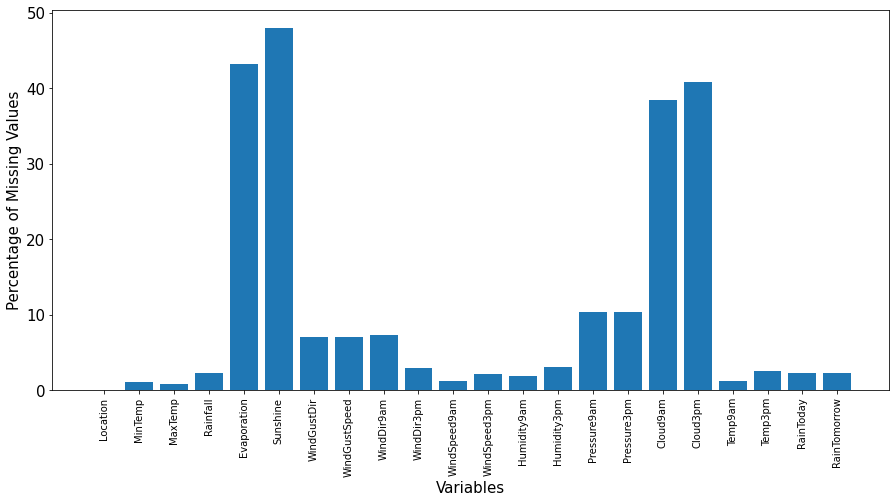

In [178]:
#Plot NaN percentages
plt.figure(figsize=(15,7))
plt.bar(missing_vals_percentages.keys(), missing_vals_percentages.values())

plt.xticks(rotation=90)
plt.yticks(fontsize=15)

plt.xlabel("Variables", fontsize=15)
plt.ylabel("Percentage of Missing Values", fontsize=15)
plt.show()

In [181]:
cols_missing_vals = {key: val for key,val in missing_vals_percentages.items() if val>0}
cols_missing_vals

{'MinTemp': 1.0208992162793895,
 'MaxTemp': 0.8669049910628351,
 'Rainfall': 2.241853430496356,
 'Evaporation': 43.1665062560154,
 'Sunshine': 48.00976213391998,
 'WindGustDir': 7.09885879279527,
 'WindGustSpeed': 7.055547916953114,
 'WindDir9am': 7.263852605527292,
 'WindDir3pm': 2.906641000962464,
 'WindSpeed9am': 1.214766946239516,
 'WindSpeed3pm': 2.105046060772721,
 'Humidity9am': 1.8245565791282827,
 'Humidity3pm': 3.09844630826344,
 'Pressure9am': 10.356799120033,
 'Pressure3pm': 10.331362573903478,
 'Cloud9am': 38.42155919153032,
 'Cloud3pm': 40.80709473394748,
 'Temp9am': 1.214766946239516,
 'Temp3pm': 2.4810944589577892,
 'RainToday': 2.241853430496356,
 'RainTomorrow': 2.245978275814657}

In [182]:
THRESHOLD = 35

cols_to_remove = [key for key, val in cols_missing_vals.items() if val>=THRESHOLD]
cols_to_remove

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [183]:
dataframe_clean_1 = dataframe.drop(columns=cols_to_remove)
dataframe_clean_1.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.700012,1007.099976,16.900000,21.799999,0.0,0.0
1,Albury,7.4,25.100000,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.599976,1007.799988,17.200001,24.299999,0.0,0.0
2,Albury,12.9,25.700001,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.599976,1008.700012,21.000000,23.200001,0.0,0.0
3,Albury,9.2,28.000000,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.599976,1012.799988,18.100000,26.500000,0.0,0.0
4,Albury,17.5,32.299999,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.799988,1006.000000,17.799999,29.700001,0.0,0.0


In [184]:
missing_vals_percentages = percentage_nan(dataframe_clean_1)
missing_vals_percentages

{'Location': 0.0,
 'MinTemp': 1.0208992162793895,
 'MaxTemp': 0.8669049910628351,
 'Rainfall': 2.241853430496356,
 'WindGustDir': 7.09885879279527,
 'WindGustSpeed': 7.055547916953114,
 'WindDir9am': 7.263852605527292,
 'WindDir3pm': 2.906641000962464,
 'WindSpeed9am': 1.214766946239516,
 'WindSpeed3pm': 2.105046060772721,
 'Humidity9am': 1.8245565791282827,
 'Humidity3pm': 3.09844630826344,
 'Pressure9am': 10.356799120033,
 'Pressure3pm': 10.331362573903478,
 'Temp9am': 1.214766946239516,
 'Temp3pm': 2.4810944589577892,
 'RainToday': 2.241853430496356,
 'RainTomorrow': 2.245978275814657}

<br>
<br>
<br>
<br>
<br>

#### Save cleaned dataframed to csv file

In [190]:
dataframe_clean_1.to_csv(r"C:\Users\Lucio\Documents\Github\Next-day-rain-prediction\1- Data\2- Processed\dataframe_clean_1.csv")

dataframe_clean_1 caracteristics:
- RainToday and RainTomorrow columns encoded from No/Yes to 0/1
- Drop columns with NaN percentage above 35%

<br>
<br>
<br>
<br>
<br>

#### Getting numerical and categorical columns

In [92]:
def get_num_cat_columns(dataframe):
    categorical_cols=dataframe.select_dtypes(include="object").columns
    numerical_cols=dataframe.select_dtypes(exclude="object").columns
    '''
    This function saves numerical and categorical columns in 2 different dataframes
    '''
    return categorical_cols, numerical_cols

In [93]:
categorical_cols, numerical_cols= get_num_cat_columns(dataframe)

<br>
<br>
<br>
<br>
<br>

### Correlations between variables

In [57]:
#Check correlation between numerical variables
correlations = dataframe.corr()
correlations

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733358,0.102339,0.364798,0.032632,0.171899,0.173513,0.173055,-0.231310,0.006111,-0.423299,-0.432824,0.043056,0.000157,0.897829,0.698574
MaxTemp,0.733358,1.000000,-0.073563,0.447289,0.315487,0.066451,0.014389,0.049507,-0.498350,-0.498725,-0.308057,-0.396339,-0.232311,-0.218368,0.879335,0.968332
Rainfall,0.102339,-0.073563,1.000000,-0.041371,-0.168777,0.125109,0.084586,0.055688,0.220661,0.247946,-0.158812,-0.119397,0.164202,0.139380,0.010933,-0.077466
Evaporation,0.364798,0.447289,-0.041371,1.000000,0.279210,0.149942,0.148681,0.101264,-0.384284,-0.293638,-0.213660,-0.233593,-0.169494,-0.160652,0.425712,0.434014
Sunshine,0.032632,0.315487,-0.168777,0.279210,1.000000,-0.031229,-0.012197,0.023176,-0.330031,-0.430357,0.035759,-0.010618,-0.505488,-0.526045,0.191385,0.331676
WindGustSpeed,0.171899,0.066451,0.125109,0.149942,-0.031229,1.000000,0.578744,0.657975,-0.208803,-0.026804,-0.425819,-0.384140,0.046261,0.072894,0.145717,0.032375
WindSpeed9am,0.173513,0.014389,0.084586,0.148681,-0.012197,0.578744,1.000000,0.512279,-0.268196,-0.031079,-0.215107,-0.165124,0.006593,0.028376,0.127491,0.004806
WindSpeed3pm,0.173055,0.049507,0.055688,0.101264,0.023176,0.657975,0.512279,1.000000,-0.143358,0.016275,-0.277277,-0.239274,0.031498,0.010460,0.161040,0.027529
Humidity9am,-0.231310,-0.498350,0.220661,-0.384284,-0.330031,-0.208803,-0.268196,-0.143358,1.000000,0.659290,0.131418,0.175914,0.355815,0.278105,-0.469774,-0.491242
Humidity3pm,0.006111,-0.498725,0.247946,-0.293638,-0.430357,-0.026804,-0.031079,0.016275,0.659290,1.000000,-0.025986,0.048527,0.396914,0.403456,-0.216951,-0.555606


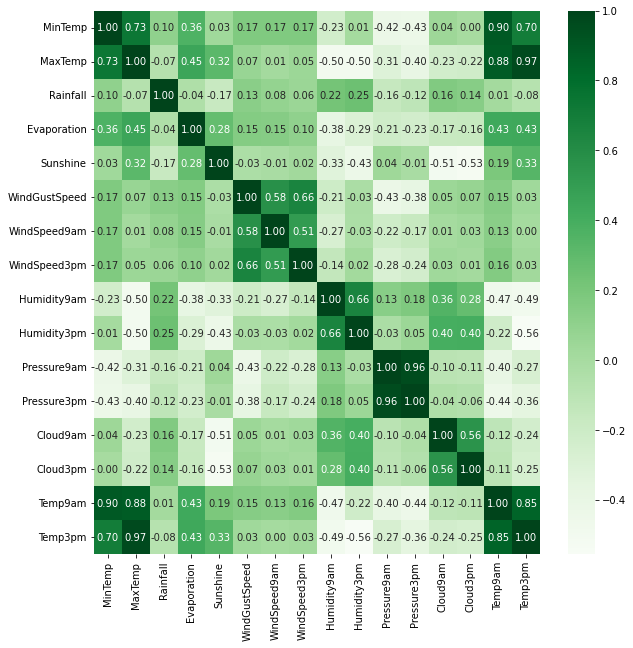

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True, cmap="Greens", fmt=".2f")
plt.show()

High correlations between:
- MinTemp & Temp9am
- MaxTemp, Temp9am & Temp3pm
- Temp9am & Temp3pm
- Pressure9am & Pressure3pm

<br>
<br>
<br>
<br>
<br>

### Handling missing values

#### Handling missing values in numerical columns

In [43]:
numerical_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

'''
SimpleImputer replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column
Other more complex replacing methods can be used (e.g. KNNImputer-Nearest neighbors imputation-
or IterativeImputer-Multivariate feature imputation)
'''
imputer= SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)
for col in numerical_cols:
    dataframe[col]= imputer.fit_transform(dataframe[[col]])

#### Handling missing values in categorical columns

In [45]:
categorical_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

#Filling the missing values for categorical variables with mode
#Location column doesn't have NaN values
dataframe['WindGustDir'] = dataframe['WindGustDir'].fillna(dataframe['WindGustDir'].mode()[0])
dataframe['WindDir9am'] = dataframe['WindDir9am'].fillna(dataframe['WindDir9am'].mode()[0])
dataframe['WindDir3pm'] = dataframe['WindDir3pm'].fillna(dataframe['WindDir3pm'].mode()[0])
dataframe['RainToday']=dataframe['RainToday'].fillna(dataframe['RainToday'].mode()[0])
dataframe['RainTomorrow']=dataframe['RainTomorrow'].fillna(dataframe['RainTomorrow'].mode()[0])

In [47]:
#Check for any missing value
dataframe.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<br>
<br>
<br>
<br>
<br>

### Exploratory Data Analysis

### Univariate analysis

#### Check unique values in each categorical column

In [48]:
dataframe["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [49]:
dataframe["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [50]:
dataframe["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [51]:
dataframe["WindDir3pm"].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [52]:
dataframe["RainToday"].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
dataframe["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

<br>
<br>
<br>
<br>
<br>

#### Balanced dataset?

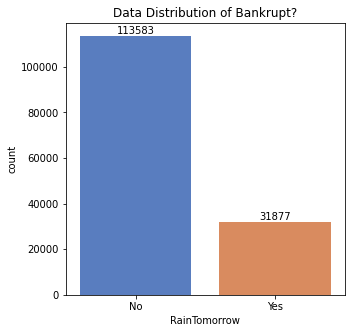

In [54]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=dataframe['RainTomorrow'], palette="muted")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Data Distribution of Bankrupt?")
plt.show()

<br>
<br>
<br>
<br>
<br>

#### Data distribution for numerical columns

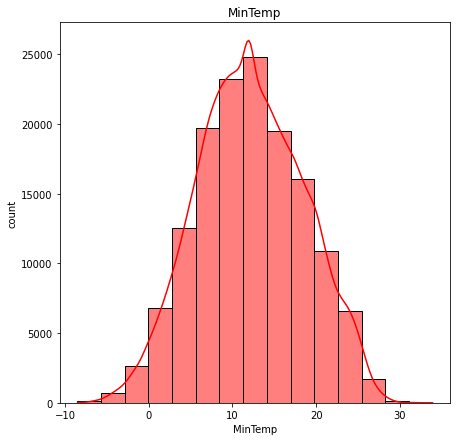

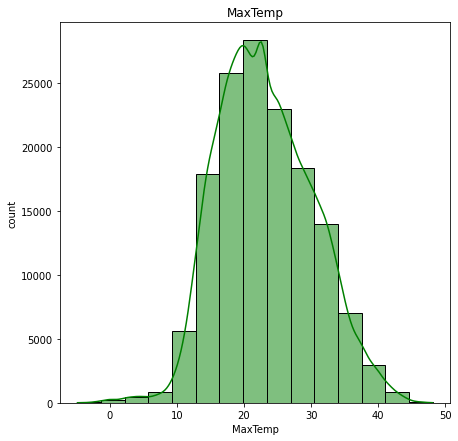

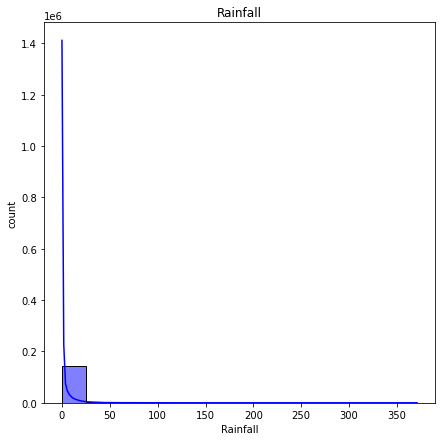

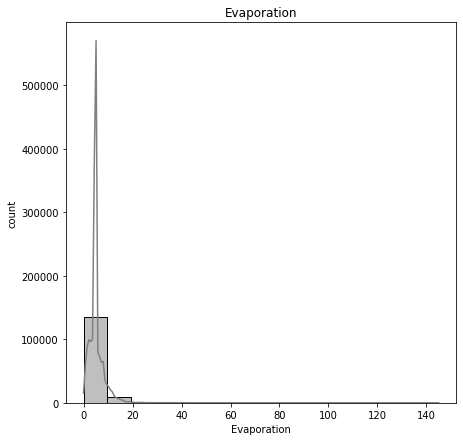

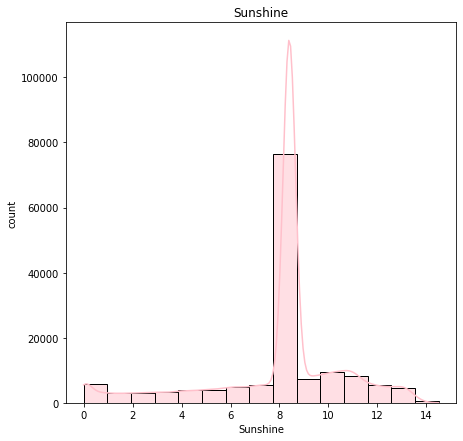

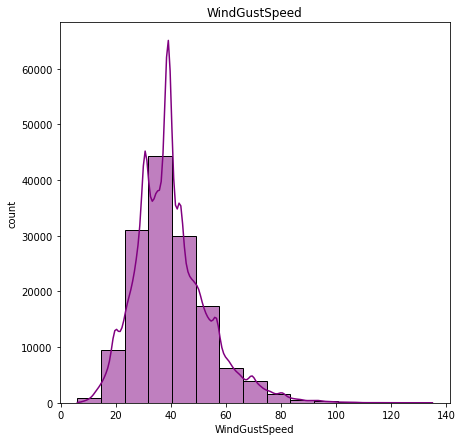

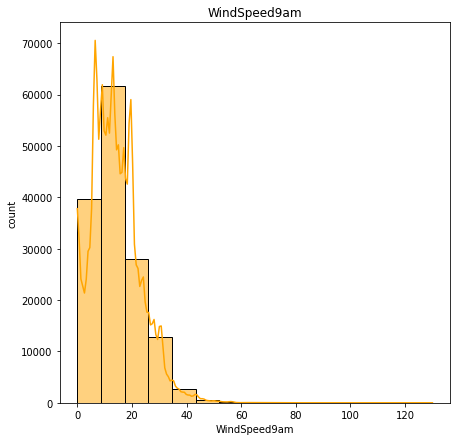

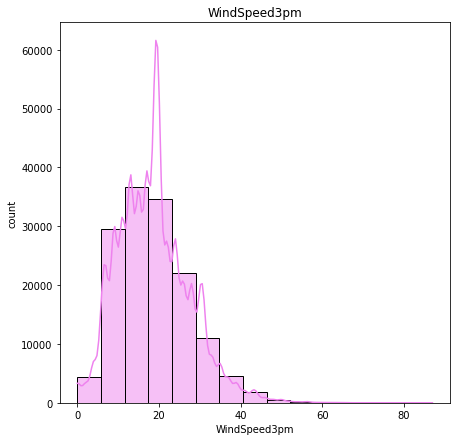

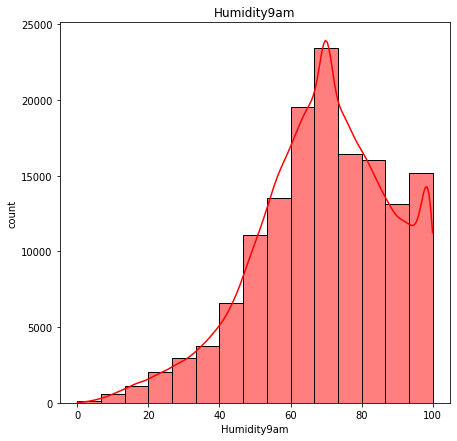

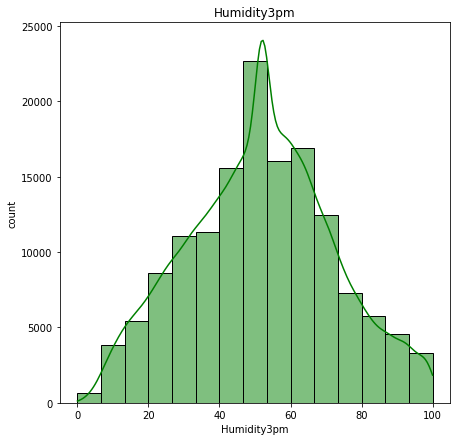

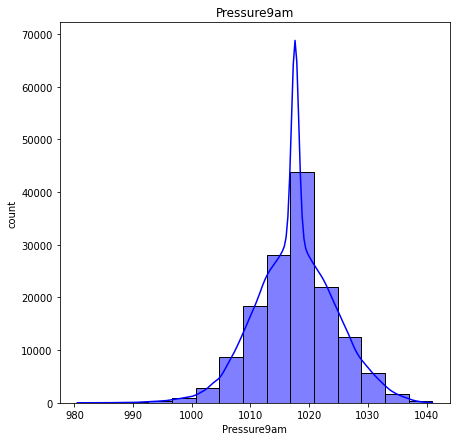

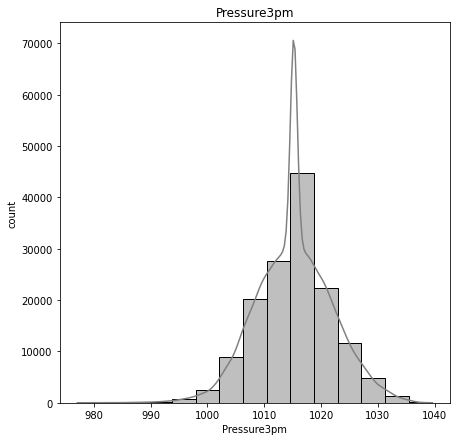

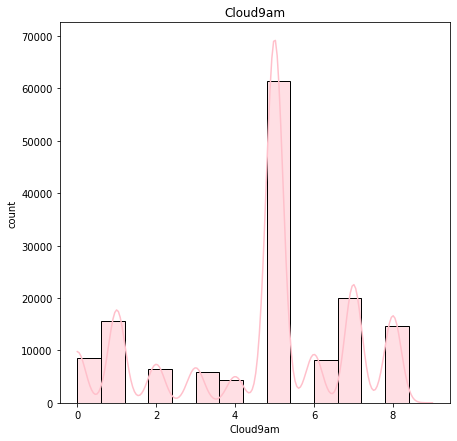

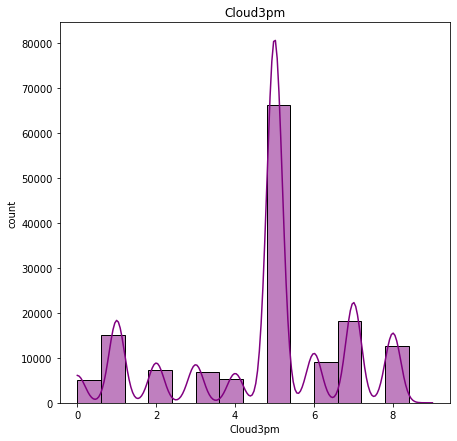

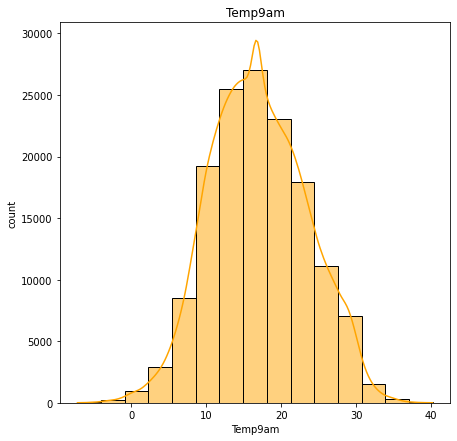

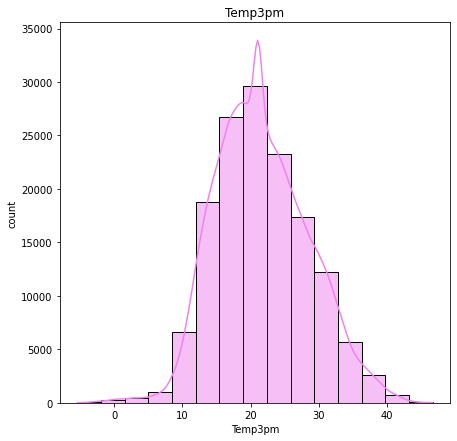

In [55]:
colors_list=["red","green","blue","grey","pink", "purple","orange","violet","red","green","blue","grey","pink", "purple","orange","violet"]
for i in range(len(numerical_cols)):
    plt.figure(figsize=(7,7))
    sns.histplot(dataframe[numerical_cols[i]], color=colors_list[i], kde=True, bins=15)
    label=numerical_cols[i]
    plt.xlabel(numerical_cols[i])
    plt.ylabel("count")
    plt.title(label)

<br>
<br>
<br>
<br>
<br>

#### Look for irrelevant columns

In [ ]:
target_correlations = correlations["TARGET"].apply(lambda corr: abs(corr)).sort_values()
target_correlations